## Geology Research

The data is taken in the Elysium Planetia region of the planet. Elysium Planetia is a region defined by high volcanic activity as result of a mantle plume with some of the highest slopes on the planet! Because of the mantle plume aspect, we decided to compare it to the Yellowstone region of the united states. The area is heavily monitered by the USGS and is centeralized by one large volcano just like Elysium Panetia (Elysium Mons).

https://pubs.usgs.gov/imap/i2782/i2782_sh1.pdf

https://link.springer.com/article/10.1007/BF00114309

https://www.earthmagazine.org/article/question-mantle-plumes/

**If yellowstone data doesnt do anything specifically cross reference the earthquake map to the IRIS database**

In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from obspy import read_inventory, read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime, Stream, read, Trace


st1 = read('Yellowstone.mseed',starttime = UTCDateTime('2023-4-18 9:00:00'),endtime=UTCDateTime('2023-4-18 11:00:00'))

channels = ['EHZ']

# stream 
st1.filter(type='highpass', freq=0.1)
st1 = st1.select(component='Z')

#trace 
tr1 = st1[0]
print(tr1)
print(tr1.stats) 
print(tr1.data)

WY.YLT.01.EHZ | 2023-04-18T09:00:00.000000Z - 2023-04-18T11:00:00.000000Z | 100.0 Hz, 720001 samples
         network: WY
         station: YLT
        location: 01
         channel: EHZ
       starttime: 2023-04-18T09:00:00.000000Z
         endtime: 2023-04-18T11:00:00.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 720001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 1104, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 12131328})
      processing: ['ObsPy 1.2.2: trim(endtime=None::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2023, 4, 18, 9, 0))', 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2023, 4, 18, 11, 0)::fill_value=None::nearest_sample=True::pad=False::starttime=None)', "ObsPy 1.2.2: filter(options={'freq': 0.1}::type='highpass')"]
[-46.61573796 -44.85854201 -40.1484474  ...,   4.3406932    6.24971834
  10.11046366]


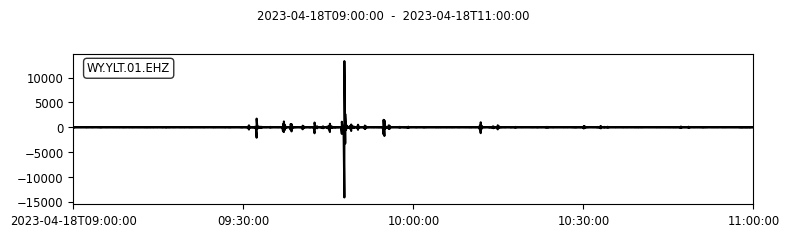

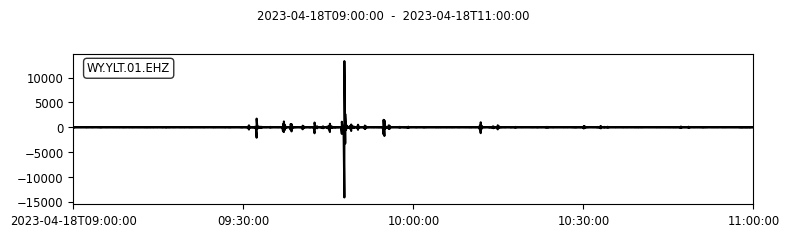

In [22]:
st1.plot()

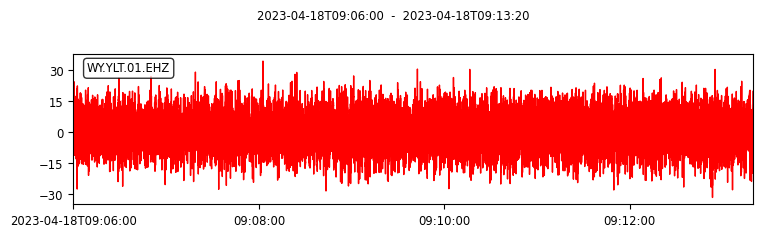

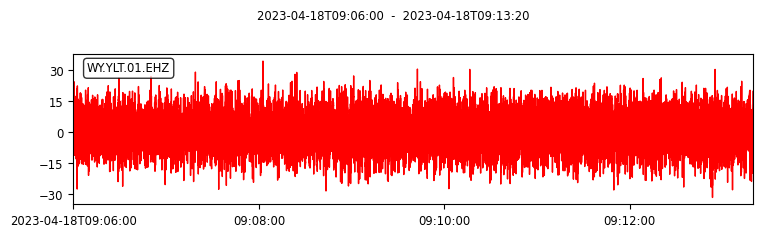

In [4]:
dt = st1[0].stats.starttime
st1.plot(color='red', tick_format='%I:%M %p',
                   starttime= dt + 360 , endtime= dt + 800)

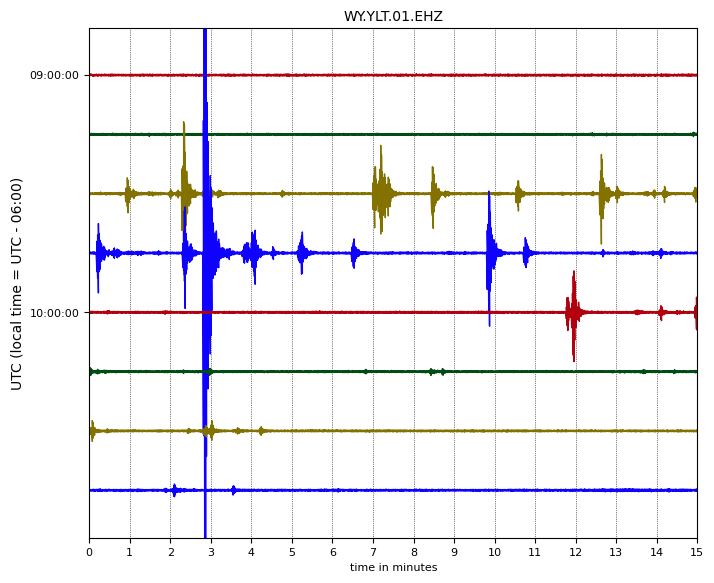

C:\Users\Chloe Locke\anaconda3\lib\site-packages\obspy\imaging\waveform.py:511: UserWarning: Could not download the events because of 'FDSNNoDataException: No data available for request.
Detailed response of server:

'.
  warnings.warn(msg)


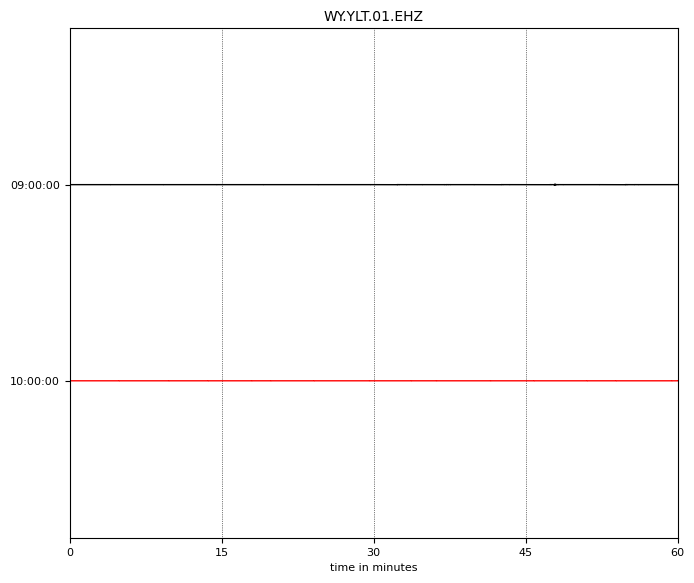

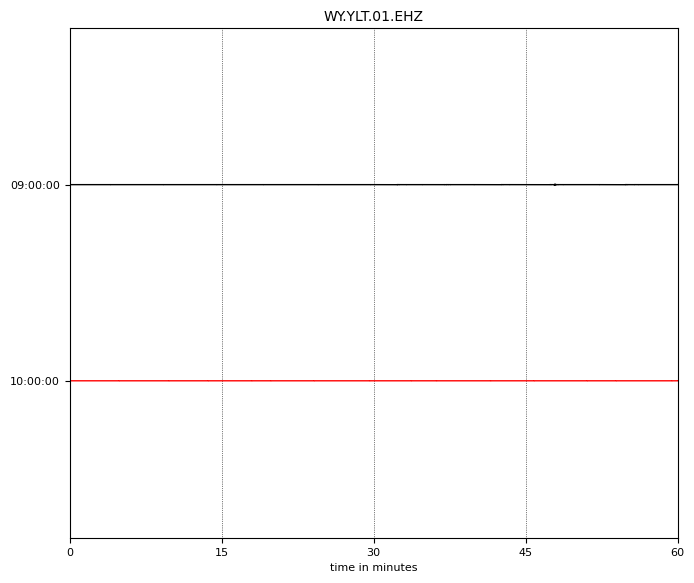

In [5]:
st1.plot(type='dayplot')

st1.plot(type="dayplot", interval=60, right_vertical_labels=False,
        vertical_scaling_range=5e6, one_tick_per_line=True,
        color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
        events={'min_magnitude': 6.5})

In [7]:
import obspy

st2 = read('Yellowstone.mseed',starttime = UTCDateTime('2023-4-18 4:00:00'),endtime=UTCDateTime('2023-4-18 16:00:00'))

print(st2)

1 Trace(s) in Stream:
WY.YLT.01.EHZ | 2023-04-18T04:00:00.000000Z - 2023-04-18T16:00:00.000000Z | 100.0 Hz, 4320001 samples


1 Trace(s) in Stream:
WY.YLT.01.EHZ | 2023-04-18T09:00:00.000000Z - 2023-04-18T11:00:00.000000Z | 100.0 Hz, 720001 samples


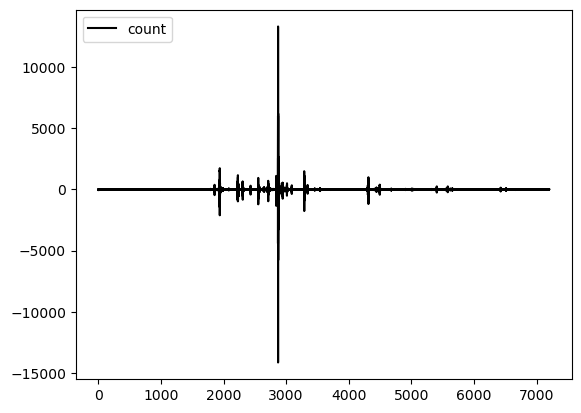

In [50]:
st3 = read('Yellowstone.mseed',starttime = UTCDateTime('2023-4-18 9:00:00'),endtime=UTCDateTime('2023-4-18 11:00:00'))
print(st3)

st3.filter(type='highpass', freq=0.1)
st3 = st3.select(component='Z')

tr1 = st3[0]

plt.plot(tr1.times(), tr1.data, "k", label="count")
plt.legend(loc=2)
#plt.set_ylabel("COUNTS")
#plt.set_xlim(2000, 4000)
